## Imports

In [1]:
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from nltk.tokenize import word_tokenize
import nltk

In [2]:
tqdm.pandas()

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/semcovici/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Definitions

In [4]:
path_raw_data = '../data/raw/'

In [5]:
# choose the corpus for the analysis
corpus = 'ig'

## Read Data

In [6]:
# read data
data = pd.read_csv(
    path_raw_data + f'train_r3_{corpus}_top_mentioned_timelines.csv', 
    sep = ';', 
    encoding='utf-8-sig'
    )

In [7]:
data.head()

,User_ID,Polarity,Texts
0,r2_ig_1,against,PQP ESSE DORAMA É MUITO FOADA(Sassy GoGo(Cheer...
1,r2_ig_4,for,Golaço!!!!!!!!! # Manda geral do time principa...
2,r2_ig_7,against,"@gabycunha86 Amanhã vou aí, deixa pra terça # ..."
3,r2_ig_8,for,3.4- O Centro de Coordenação da Operação está ...
4,r2_ig_10,for,"Me arrependi de excluir meu outro tt, agora ti..."


## analysis

### Basic describe

In [8]:
# % of observations per label
data.Polarity.value_counts() / len(data) 

Polarity
against    0.565145
for        0.434855
Name: count, dtype: float64

In [9]:
# question: there is nan data?
print('len data with nan: ', data.shape)
print('len data without nan: ', data.dropna().shape)

len data with nan:  (1796, 3)
len data without nan:  (1796, 3)


In [10]:
# question: there is rows completely duplicated?
print('len data with duplicates: ', data.shape)
print('len data without duplicates: ', data.drop_duplicates().shape)

len data with duplicates:  (1796, 3)


len data without duplicates:  (1796, 3)


In [11]:
# question: there is rows with duplicated texts?
print('len data with duplicates: ', data['Texts'].shape)
print('len data without duplicates: ', data['Texts'].drop_duplicates().shape)

len data with duplicates:  (1796,)
len data without duplicates:  (1522,)


In [12]:
# question: where is the duplicated texts?
data[data.duplicated(subset=['Texts'])].sort_values('Texts')

,User_ID,Polarity,Texts
1381,r2_ig_1846,against,(...) p/ conscientizar e explicar como elimina...
1274,r2_ig_1693,against,(...) p/ conscientizar e explicar como elimina...
1214,r2_ig_1616,against,- Twitcam ao vivo! # - esse é o Netshow.me! (@...
1354,r2_ig_1810,for,2T/7' Cano pega de primeira no canto e faz Tad...
983,r2_ig_1324,for,2T/7' Cano pega de primeira no canto e faz Tad...
...,...,...,...
1610,r2_ig_2164,against,"É RETA FINAL, FIEL! E você não pode ficar de f..."
844,r2_ig_1134,against,"É RETA FINAL, FIEL! E você não pode ficar de f..."
1578,r2_ig_2118,against,“@andressaOM_: So eu que acho que nao era o @b...
1464,r2_ig_1963,for,“@andressaOM_: So eu que acho que nao era o @b...


In [13]:
# question: there is duplicated users?
print('len data with duplicates: ', data['User_ID'].shape)
print('len data without duplicates: ', data['User_ID'].drop_duplicates().shape)

len data with duplicates:  (1796,)
len data without duplicates:  (1796,)


In [14]:
# create the dataset to analysis
## remove the rows who have duplicated texts
data_2_anl = data.drop_duplicates(subset=['Texts'])
data_2_anl

,User_ID,Polarity,Texts
0,r2_ig_1,against,PQP ESSE DORAMA É MUITO FOADA(Sassy GoGo(Cheer...
1,r2_ig_4,for,Golaço!!!!!!!!! # Manda geral do time principa...
2,r2_ig_7,against,"@gabycunha86 Amanhã vou aí, deixa pra terça # ..."
3,r2_ig_8,for,3.4- O Centro de Coordenação da Operação está ...
4,r2_ig_10,for,"Me arrependi de excluir meu outro tt, agora ti..."
...,...,...,...
1790,r2_ig_2395,against,ontem a rafaela me abandonou e eu fui pro omeg...
1792,r2_ig_2398,against,Em todos os 0 estados dos EUA a partir de hoje...
1793,r2_ig_2399,against,isso daqui so eu jogando prime 0 # se rolar ví...
1794,r2_ig_2400,against,@amndwz_ nao acredito! # @amndwz_ MUDANÇA # @a...


In [15]:
#number of observations per label
data_2_anl.Polarity.value_counts() / len(data)

Polarity
against    0.461024
for        0.386414
Name: count, dtype: float64

### numerical analysis of length of texts

In [16]:
# create an list of the texts in 'Texts'
data_2_anl['list_texts'] = data_2_anl.Texts.progress_apply(lambda x: x.split(' # '))
data_2_anl.head()

 37%|███▋      | 561/1522 [00:00<00:00, 1606.92it/s]

100%|██████████| 1522/1522 [00:00<00:00, 1592.67it/s]
/tmp/ipykernel_176271/1561259299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2_anl['list_texts'] = data_2_anl.Texts.progress_apply(lambda x: x.split(' # '))


,User_ID,Polarity,Texts,list_texts
0,r2_ig_1,against,PQP ESSE DORAMA É MUITO FOADA(Sassy GoGo(Cheer...,[PQP ESSE DORAMA É MUITO FOADA(Sassy GoGo(Chee...
1,r2_ig_4,for,Golaço!!!!!!!!! # Manda geral do time principa...,"[Golaço!!!!!!!!!, Manda geral do time principa..."
2,r2_ig_7,against,"@gabycunha86 Amanhã vou aí, deixa pra terça # ...","[@gabycunha86 Amanhã vou aí, deixa pra terça, ..."
3,r2_ig_8,for,3.4- O Centro de Coordenação da Operação está ...,[3.4- O Centro de Coordenação da Operação está...
4,r2_ig_10,for,"Me arrependi de excluir meu outro tt, agora ti...","[Me arrependi de excluir meu outro tt, agora t..."


In [17]:
# count the texts in 'Texts'
data_2_anl['n_texts'] = data_2_anl.list_texts.progress_apply(lambda x: len(x))
data_2_anl.head()

100%|██████████| 1522/1522 [00:00<00:00, 844408.82it/s]
/tmp/ipykernel_176271/1769049565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2_anl['n_texts'] = data_2_anl.list_texts.progress_apply(lambda x: len(x))


,User_ID,Polarity,Texts,list_texts,n_texts
0,r2_ig_1,against,PQP ESSE DORAMA É MUITO FOADA(Sassy GoGo(Cheer...,[PQP ESSE DORAMA É MUITO FOADA(Sassy GoGo(Chee...,878
1,r2_ig_4,for,Golaço!!!!!!!!! # Manda geral do time principa...,"[Golaço!!!!!!!!!, Manda geral do time principa...",533
2,r2_ig_7,against,"@gabycunha86 Amanhã vou aí, deixa pra terça # ...","[@gabycunha86 Amanhã vou aí, deixa pra terça, ...",956
3,r2_ig_8,for,3.4- O Centro de Coordenação da Operação está ...,[3.4- O Centro de Coordenação da Operação está...,1153
4,r2_ig_10,for,"Me arrependi de excluir meu outro tt, agora ti...","[Me arrependi de excluir meu outro tt, agora t...",91


In [18]:
# create tokens in each text in 'Texts'
data_2_anl['list_texts_tokens'] = data_2_anl.list_texts.progress_apply(lambda x: [word_tokenize(text, language='portuguese') for text in x])
data_2_anl.head()

100%|██████████| 1522/1522 [03:39<00:00,  6.92it/s]
/tmp/ipykernel_176271/279838040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2_anl['list_texts_tokens'] = data_2_anl.list_texts.progress_apply(lambda x: [word_tokenize(text, language='portuguese') for text in x])


,User_ID,Polarity,Texts,list_texts,n_texts,list_texts_tokens
0,r2_ig_1,against,PQP ESSE DORAMA É MUITO FOADA(Sassy GoGo(Cheer...,[PQP ESSE DORAMA É MUITO FOADA(Sassy GoGo(Chee...,878,"[[PQP, ESSE, DORAMA, É, MUITO, FOADA, (, Sassy..."
1,r2_ig_4,for,Golaço!!!!!!!!! # Manda geral do time principa...,"[Golaço!!!!!!!!!, Manda geral do time principa...",533,"[[Golaço, !, !, !, !, !, !, !, !, !], [Manda, ..."
2,r2_ig_7,against,"@gabycunha86 Amanhã vou aí, deixa pra terça # ...","[@gabycunha86 Amanhã vou aí, deixa pra terça, ...",956,"[[@, gabycunha86, Amanhã, vou, aí, ,, deixa, p..."
3,r2_ig_8,for,3.4- O Centro de Coordenação da Operação está ...,[3.4- O Centro de Coordenação da Operação está...,1153,"[[3.4-, O, Centro, de, Coordenação, da, Operaç..."
4,r2_ig_10,for,"Me arrependi de excluir meu outro tt, agora ti...","[Me arrependi de excluir meu outro tt, agora t...",91,"[[Me, arrependi, de, excluir, meu, outro, tt, ..."


In [19]:
# count tokens in each text in 'Texts'
data_2_anl['list_texts_len'] = data_2_anl.list_texts_tokens.progress_apply(lambda x: [len(text) for text in x])
data_2_anl.head()

 52%|█████▏    | 786/1522 [00:00<00:00, 7848.11it/s]

100%|██████████| 1522/1522 [00:00<00:00, 7407.00it/s]
/tmp/ipykernel_176271/4170615992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2_anl['list_texts_len'] = data_2_anl.list_texts_tokens.progress_apply(lambda x: [len(text) for text in x])


,User_ID,Polarity,Texts,list_texts,n_texts,list_texts_tokens,list_texts_len
0,r2_ig_1,against,PQP ESSE DORAMA É MUITO FOADA(Sassy GoGo(Cheer...,[PQP ESSE DORAMA É MUITO FOADA(Sassy GoGo(Chee...,878,"[[PQP, ESSE, DORAMA, É, MUITO, FOADA, (, Sassy...","[31, 12, 8, 9, 31, 17, 15, 13, 20, 14, 19, 5, ..."
1,r2_ig_4,for,Golaço!!!!!!!!! # Manda geral do time principa...,"[Golaço!!!!!!!!!, Manda geral do time principa...",533,"[[Golaço, !, !, !, !, !, !, !, !, !], [Manda, ...","[10, 7, 8, 11, 5, 5, 8, 6, 4, 3, 13, 8, 7, 9, ..."
2,r2_ig_7,against,"@gabycunha86 Amanhã vou aí, deixa pra terça # ...","[@gabycunha86 Amanhã vou aí, deixa pra terça, ...",956,"[[@, gabycunha86, Amanhã, vou, aí, ,, deixa, p...","[9, 5, 11, 4, 12, 13, 2, 25, 10, 7, 12, 5, 7, ..."
3,r2_ig_8,for,3.4- O Centro de Coordenação da Operação está ...,[3.4- O Centro de Coordenação da Operação está...,1153,"[[3.4-, O, Centro, de, Coordenação, da, Operaç...","[50, 23, 39, 16, 13, 9, 43, 53, 19, 48, 41, 27..."
4,r2_ig_10,for,"Me arrependi de excluir meu outro tt, agora ti...","[Me arrependi de excluir meu outro tt, agora t...",91,"[[Me, arrependi, de, excluir, meu, outro, tt, ...","[14, 9, 4, 11, 9, 23, 19, 13, 9, 19, 10, 24, 2..."


[Text(0.5, 1.0, 'number of comments of friends per user'),
 Text(0.5, 0, 'number of comments')]

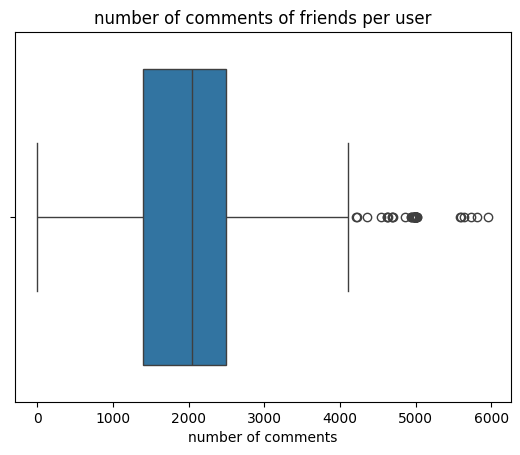

In [20]:
sns.boxplot(
    data=data_2_anl,
    x="n_texts"
    ).set(
        title='number of comments of friends per user',
        xlabel='number of comments'
    )

[Text(0.5, 1.0, 'number of comments of friends per user'),
 Text(0.5, 0, 'number of comments')]

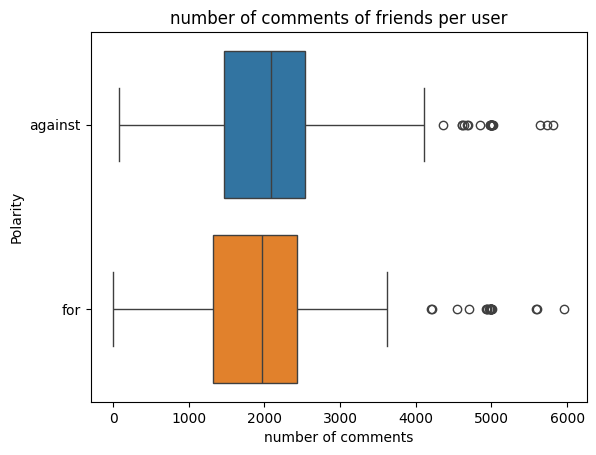

In [21]:
sns.boxplot(
    data=data_2_anl,
    x="n_texts",
    y='Polarity',
    hue='Polarity'
    ).set(
        title='number of comments of friends per user',
        xlabel='number of comments'
    )

In [22]:
list_for_n_tks = []
list_against_n_tks = []
for idx, row in tqdm(data_2_anl.iterrows(), total = len(data_2_anl)):
    
    label = row['Polarity']
    list_texts_len = row['list_texts_len']
    
    if label == 'for':
        list_for_n_tks += list_texts_len
    elif label == 'against':
        list_against_n_tks += list_texts_len

100%|██████████| 1522/1522 [00:00<00:00, 16200.84it/s]


[Text(0.5, 1.0, 'number of token in comments by polarity'),
 Text(0.5, 0, 'number of tokens')]

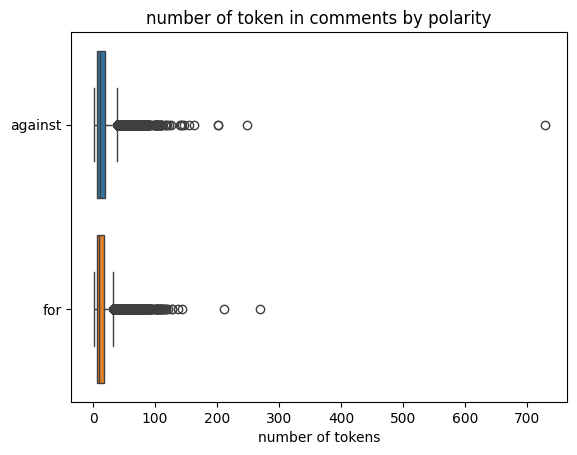

In [23]:
sns.boxplot(
    data={'against': list_against_n_tks, 'for': list_for_n_tks},
    orient = 'h',
    ).set(
        title='number of token in comments by polarity',
        xlabel='number of tokens'
    )

[Text(0.5, 1.0, 'number of token in comments by polarity (without outliers)'),
 Text(0.5, 0, 'number of tokens')]

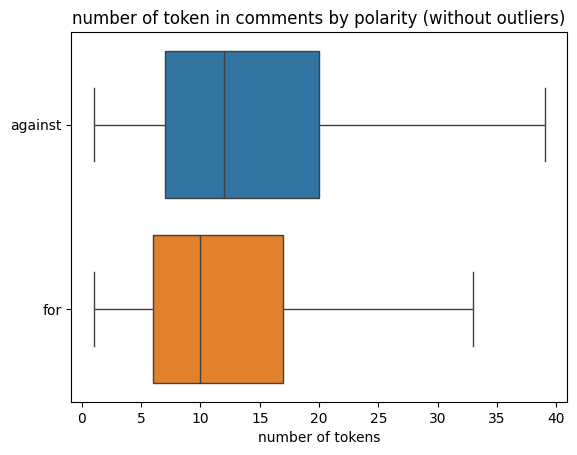

In [24]:
sns.boxplot(
    data={'against': list_against_n_tks, 'for': list_for_n_tks},
    orient = 'h',
    showfliers = False
    ).set(
        title='number of token in comments by polarity (without outliers)',
        xlabel='number of tokens'
    )